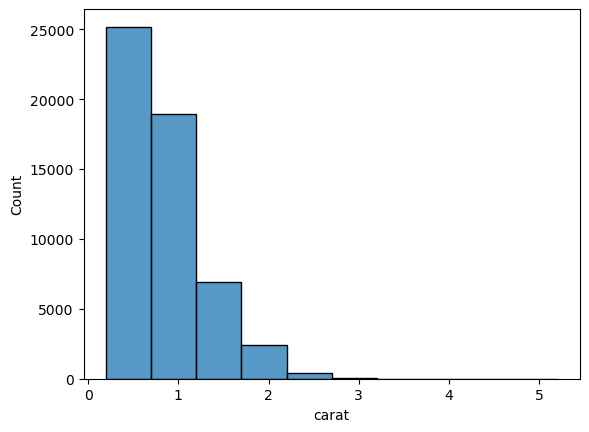

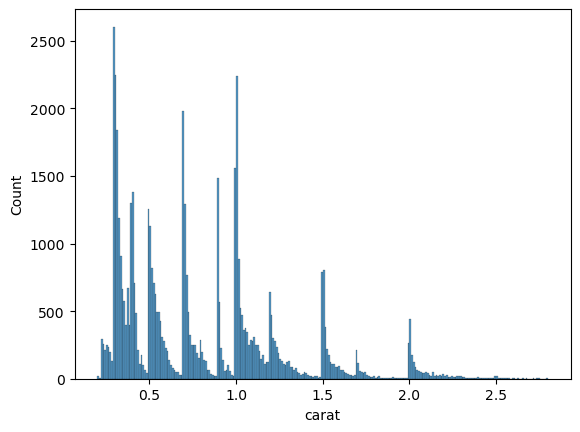

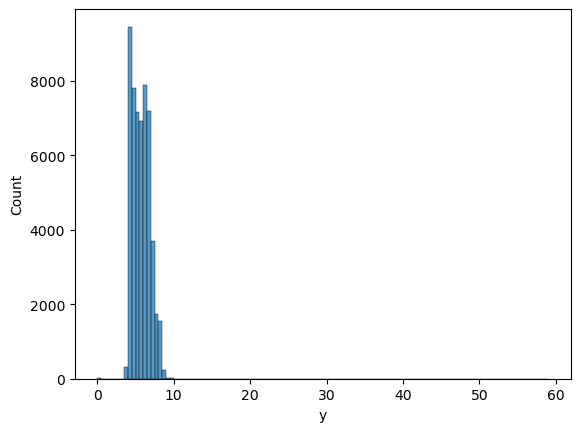

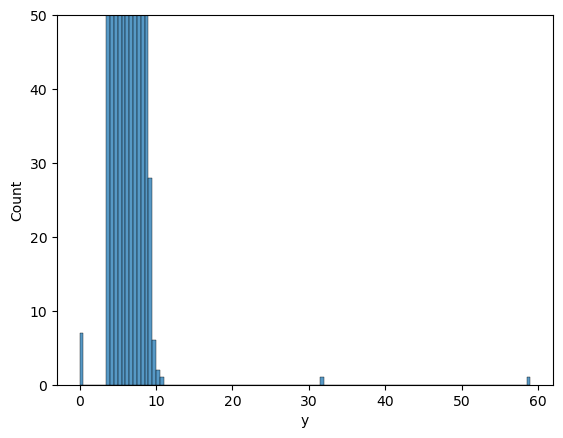

       price     x     y     z
11963   5139  0.00   0.0  0.00
15951   6381  0.00   0.0  0.00
24520  12800  0.00   0.0  0.00
26243  15686  0.00   0.0  0.00
27429  18034  0.00   0.0  0.00
49556   2130  0.00   0.0  0.00
49557   2130  0.00   0.0  0.00
49189   2075  5.15  31.8  5.12
24067  12210  8.09  58.9  8.06


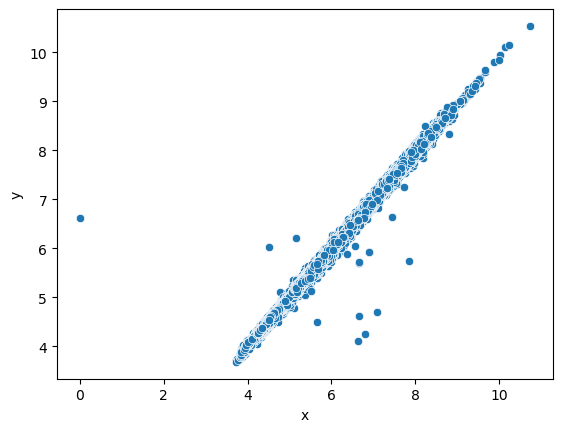

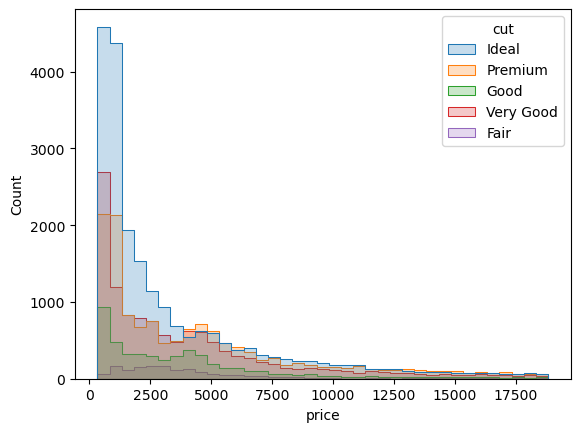

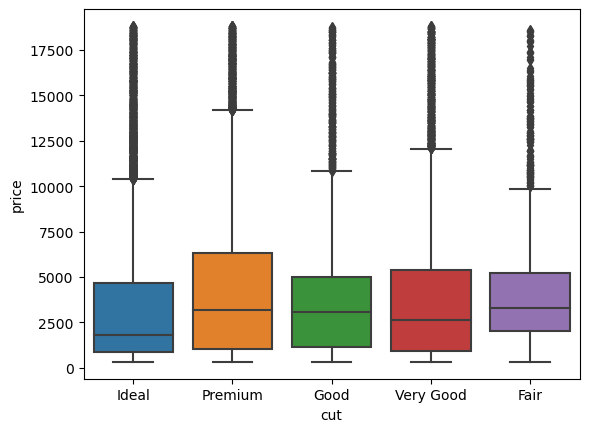

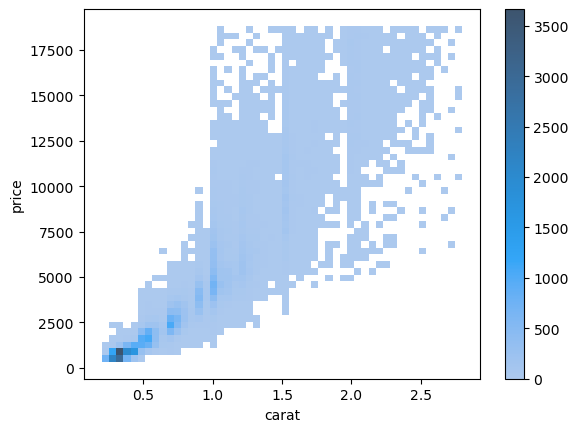

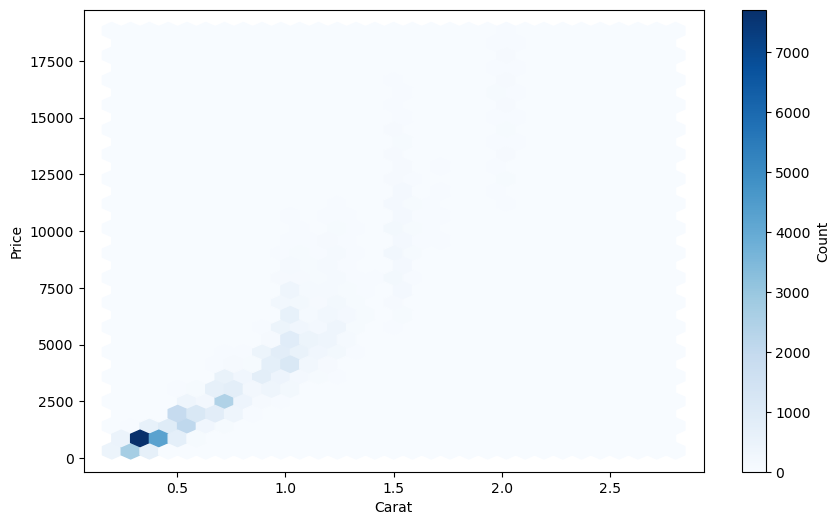

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the diamonds dataset loaded as a pandas DataFrame
diamonds = pd.read_csv('data/diamonds.csv')
flights = pd.read_csv("flights.csv")

# Plot 1
sns.histplot(data=diamonds, x='carat', binwidth=0.5)
plt.show()

# Plot 2
smaller = diamonds[diamonds['carat'] < 3]
sns.histplot(data=smaller, x='carat', binwidth=0.01)
plt.show()

# Plot 3 & 4 (they are the same)
sns.histplot(data=diamonds, x='y', binwidth=0.5)
plt.show()

# Plot 5
sns.histplot(data=diamonds, x='y', binwidth=0.5)
plt.ylim(0, 50)
plt.show()

# Data manipulation for unusual
unusual = diamonds[(diamonds['y'] < 3) | (diamonds['y'] > 20)]
unusual = unusual[['price', 'x', 'y', 'z']].sort_values(by='y')
print(unusual)

# Data manipulation for diamonds2
diamonds2 = diamonds.copy()
diamonds2.loc[(diamonds2['y'] < 3) | (diamonds2['y'] > 20), 'y'] = np.nan

# Plot 6 & 7
sns.scatterplot(data=diamonds2, x='x', y='y')
plt.show()

# Note: Skipping the flights dataset manipulation and plotting, as it was not provided

# Plot 8, 9 & 10
sns.histplot(data=diamonds, x='price', hue='cut', element='step', binwidth=500, linewidth=0.75)
plt.show()

# Plot 11
sns.boxplot(data=diamonds, x='cut', y='price')
plt.show()

# Note: Assuming mpg dataset is loaded. Skipping the related plots for brevity.

# Plot 12
sns.histplot(data=smaller, x='carat', y='price', bins=50, cbar=True)
plt.show()

# Plot 13 (geom_hex equivalent)
plt.figure(figsize=(10, 6))
plt.hexbin(smaller['carat'], smaller['price'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()


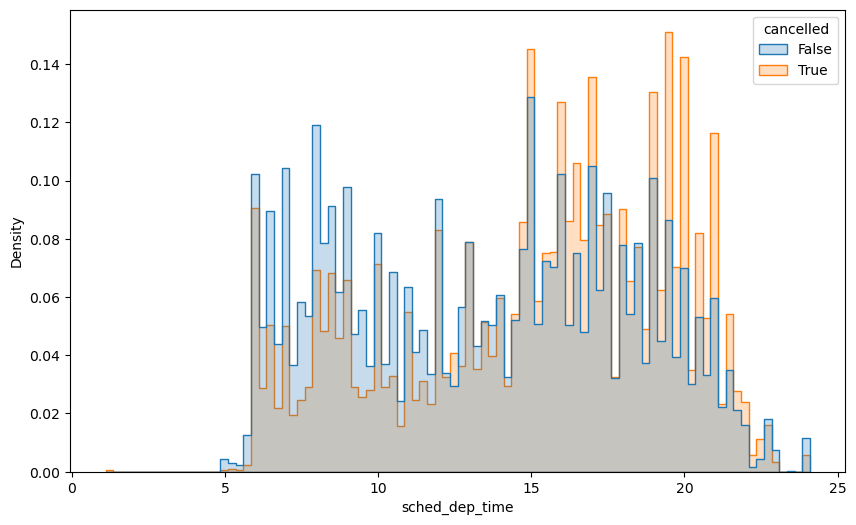

In [4]:
flights['cancelled'] = flights['dep_time'].isna()
flights['sched_hour'] = flights['sched_dep_time'] // 100
flights['sched_min'] = flights['sched_dep_time'] % 100
flights['sched_dep_time'] = flights['sched_hour'] + (flights['sched_min'] / 60)

# Plotting
plt.figure(figsize=(10,6))
sns.histplot(data=flights, x='sched_dep_time', hue='cancelled', element='step', stat="density", common_norm=False, binwidth=1/4)
plt.show()

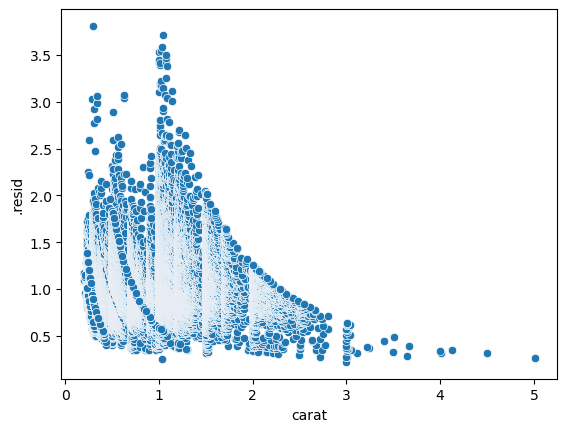

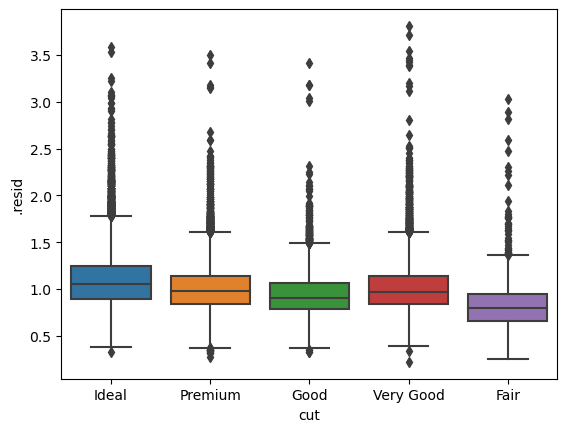

In [6]:
import numpy as np
import statsmodels.api as sm

# Load the diamonds dataset
diamonds = pd.read_csv('data/diamonds.csv')

# Data transformations
diamonds['log_price'] = np.log(diamonds['price'])
diamonds['log_carat'] = np.log(diamonds['carat'])

# Linear regression
X = diamonds['log_carat']
X = sm.add_constant(X)  # adding a constant (intercept) to the model
y = diamonds['log_price']

model = sm.OLS(y, X).fit()

# Calculate residuals
diamonds['.resid'] = np.exp(model.resid)

# Plotting residuals vs. carat
sns.scatterplot(data=diamonds, x='carat', y='.resid')
plt.show()

# Plotting residuals vs. cut
sns.boxplot(data=diamonds, x='cut', y='.resid')
plt.show()


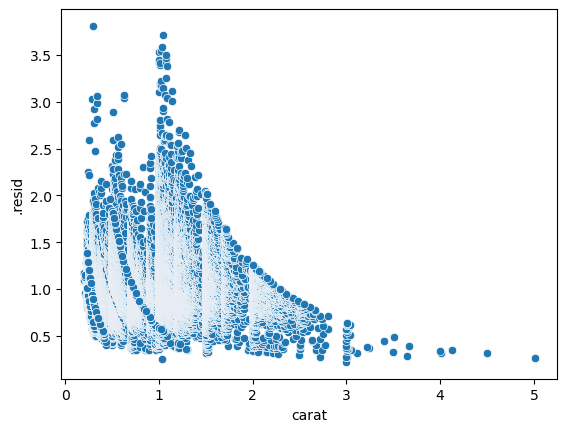

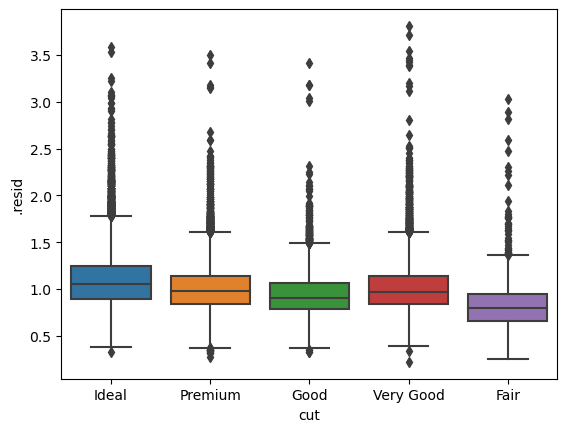

In [8]:
#use sckit-learn instead
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the diamonds dataset
diamonds = pd.read_csv('data/diamonds.csv')

# Data transformations
diamonds['log_price'] = np.log(diamonds['price'])
diamonds['log_carat'] = np.log(diamonds['carat'])

# Linear regression using scikit-learn
X = diamonds[['log_carat']]
y = diamonds['log_price']

model = LinearRegression().fit(X, y)

# Predict and calculate residuals
diamonds['predicted'] = model.predict(X)
diamonds['.resid'] = np.exp(y - diamonds['predicted'])

# Plotting residuals vs. carat
sns.scatterplot(data=diamonds, x='carat', y='.resid')
plt.show()

# Plotting residuals vs. cut
sns.boxplot(data=diamonds, x='cut', y='.resid')
plt.show()
